In [ ]:
import pickle 
import time
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import merge, Input
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in_features = open('/content/drive/MyDrive/pkl-files/features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('/content/drive/MyDrive/pkl-files/labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
#y = to_categorical(y)

In [ ]:
print(len(x))
print(len(y))

3008
3008


In [ ]:
print(x.shape)

(3008, 224, 224, 3)


In [ ]:
print(y.shape)

(3008,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2105, 224, 224, 3)
(2105,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(903, 224, 224, 3)
(903,)


In [ ]:
classes = 3

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')


last_layer = model.get_layer('fc2').output
X = last_layer
d1 = Dropout(0.3, name='dropout_layer_1')(X)
out = Dense(classes, activation='softmax', name='output')(d1)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

print(image_input.shape)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

custom_vgg_model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

t = time.time()

hist = custom_vgg_model.fit(x_train, y_train, batch_size=32, epochs=12, verbose=2, validation_split=0.2)

print('Training time: %s' % (t - time.time()))


Epoch 1/12
53/53 - 37s - loss: 1.2237 - accuracy: 0.5238 - val_loss: 0.8224 - val_accuracy: 0.6532 - 37s/epoch - 701ms/step
Epoch 2/12
53/53 - 21s - loss: 0.7540 - accuracy: 0.6704 - val_loss: 0.3752 - val_accuracy: 0.8789 - 21s/epoch - 391ms/step
Epoch 3/12
53/53 - 20s - loss: 0.6005 - accuracy: 0.7607 - val_loss: 0.5305 - val_accuracy: 0.7838 - 20s/epoch - 369ms/step
Epoch 4/12
53/53 - 20s - loss: 0.4947 - accuracy: 0.7898 - val_loss: 0.2884 - val_accuracy: 0.8931 - 20s/epoch - 369ms/step
Epoch 5/12
53/53 - 20s - loss: 0.4544 - accuracy: 0.8165 - val_loss: 0.5049 - val_accuracy: 0.7886 - 20s/epoch - 369ms/step
Epoch 6/12
53/53 - 20s - loss: 0.3921 - accuracy: 0.8367 - val_loss: 0.2093 - val_accuracy: 0.9311 - 20s/epoch - 370ms/step
Epoch 7/12
53/53 - 20s - loss: 0.3645 - accuracy: 0.8599 - val_loss: 0.1904 - val_accuracy: 0.9359 - 20s/epoch - 370ms/step
Epoch 8/12
53/53 - 20s - loss: 0.3419 - accuracy: 0.8682 - val_loss: 0.2431 - val_accuracy: 0.9121 - 20s/epoch - 370ms/step
Epoch 9/

In [ ]:
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test , batch_size=10, verbose=2)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

91/91 - 16s - loss: 0.1666 - accuracy: 0.9446 - 16s/epoch - 174ms/step
[INFO] loss=0.1666, accuracy: 94.4629%


In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


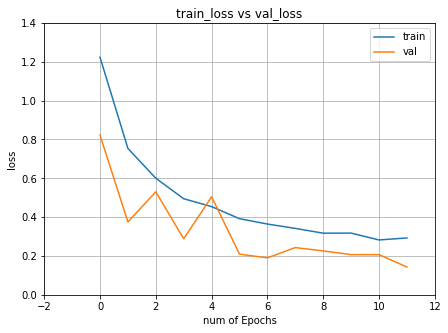

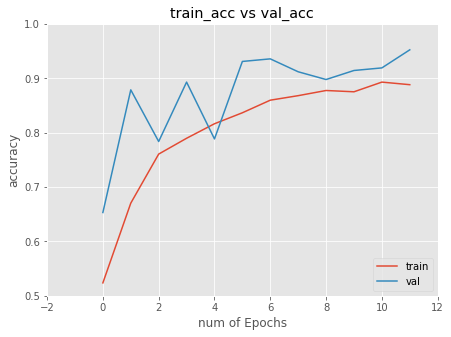

In [ ]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(12)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['ggplot'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])